In [ ]:
!pip install kaggle
from google.colab import files 
#files.open('/content/drive/MyDrive/Colab Notebooks/json kaggle')
files.upload() #download and upload json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d ritesh2000/covid19-vaccine-tweets

 91% 31.0M/34.1M [00:00<00:00, 40.2MB/s]
100% 34.1M/34.1M [00:00<00:00, 76.7MB/s]


In [ ]:
from zipfile import ZipFile
file_name= "covid19-vaccine-tweets.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############

from keras.preprocessing.text import Tokenizer         #######
from keras.preprocessing.sequence import pad_sequences #######
from keras.models import Sequential
from keras.layers import Dropout , Conv1D ,MaxPool1D,Activation , Dense , Flatten , Embedding , LSTM ####

from keras import utils
from keras.callbacks import ReduceLROnPlateau , EarlyStopping


#nltk

import nltk
from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######


from textblob import TextBlob # TextBlob - Python library for processing textual data
import random
np.random.seed(0)




In [ ]:
#load data 
df = pd.read_csv('/content/file.csv')

In [ ]:
df1= df.copy()

In [ ]:
# select only english tweet 
df2 = df1[df1['language']=='en']

In [ ]:
df2 = df2[['date' , 'tweet']]
df2.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
5,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
df2['tweet'].isna().sum()

0

In [ ]:
df2['date'].isna().sum()

0

In [ ]:
df2.shape

(201030, 2)

In [ ]:
#to change df2 to data.this is the main data 

data = df2.copy()  

data.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
5,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
data['process_tweet'] = data['tweet'].copy()
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,Now states shall have wait for thier Vidhan Sa...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...,@MisseeMonis They said vaccine for all but not...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...","BJP really presenting ""free COVID vaccine"" as ..."
5,2020-10-22,Another dose of daily miserablism from Planet ...,Another dose of daily miserablism from Planet ...


# Preprocessing the Tweet


In [ ]:
def clean_data(txt):
  txt = txt.lower()  # lowercase
  txt = re.sub(r'@[A-Za-z0-9_]+' , '' , txt)   #remove mentions
  txt = re.sub(r'#' , '' , txt) #remove hashtags
  txt = re.sub(r'RT : ','' , txt) # remove retweets
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\./\/]+' , '' , txt) #removes url
  txt = re.sub('\[.*?\]' , '' , txt) #remove square brackets
  txt = re.sub(r'[^\w\s]' , '' , txt) #remove puntuations
  txt = re.sub('\w*\d\w*' , '' ,txt) #removes words containig numbers
  txt = re.sub('\n' , '' ,txt) #remove new lines
 

  return txt


In [ ]:
data['process_tweet'] = data['process_tweet'].apply(clean_data)
data['process_tweet']

0          isnt it the best poll promise ever free covid...
1         now states shall have wait for thier vidhan sa...
3          they said vaccine for all but not when free c...
4         bjp really presenting free covid vaccine as a ...
5         another dose of daily miserablism from planet ...
                                ...                        
209924     plenty of companies chasing heat making crazy...
209925     easy researchers develop a covid vaccine and ...
209926       the sars vaccine caused more harm than good...
209927    i guess the  months before the covid vaccine i...
209928     yaya now my insurance can get charged for a c...
Name: process_tweet, Length: 201030, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removig stop words

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt):
  rmv_stpwords = [i for i in txt.split() if i not in stopwords]
  rmv_stpwords_join = ' '.join(rmv_stpwords)
  return rmv_stpwords_join

 

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(remove_stopwords)

data.head()#after removing stopwords

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promise ever free covid vaccine...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,states shall wait thier vidhan sabha election ...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccine free covid vaccine new lakhs rs e...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp really presenting free covid vaccine state...
5,2020-10-22,Another dose of daily miserablism from Planet ...,another dose daily miserablism planet grauniad...


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [ ]:
def stemming(txt):
  txt =[st.stem(word) for word in txt.split()]
  txt_join = ' '.join(txt)
  return txt_join

#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(stemming)
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...
5,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
# i dont code the removal of the most used word ,............................. @joy

#frequent word

# Labeling

5 labels: 
strongly positive,
positive,
nuteral,
negative,
strongly negetative.


In [ ]:
def get_text_subjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def get_text_polarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
#add 2 columns(subjectivity and polarity) to the data

data['Subjectivity'] = data['process_tweet'].apply(get_text_subjectivity)

data['Polarity'] = data['process_tweet'].apply(get_text_polarity)

In [ ]:
data.head() #after adding subjectivity and polarity

,date,tweet,process_tweet,Subjectivity,Polarity
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,0.517500,0.197500
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.900000,0.800000
3,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.718182,0.378788
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.525000,0.500000
5,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.000000,0.000000


In [ ]:
#Labeling
def get_text_analysis(i):
  if (i<-0.5):
    return 'Strongly Negative'
  elif ((i<0 ) and (i >= -0.5)):
    return 'Negative'
  elif (i == 0):
    return 'Neutral'
  elif (i>0 and i<=0.5):
    return 'Positive'
  else:
    return 'Strongly Positive'



In [ ]:
data['Sentiment'] = data['Polarity'].apply(get_text_analysis)

In [ ]:
data.head()

,date,tweet,process_tweet,Subjectivity,Polarity,Sentiment
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,0.517500,0.197500,Positive
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.900000,0.800000,Strongly Positive
3,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.718182,0.378788,Positive
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.525000,0.500000,Positive
5,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.000000,0.000000,Neutral


In [ ]:
df_strongly_pos = data[data['Sentiment']=='Strongly Positive']
print(df_strongly_pos.shape[0])

print(str(df_strongly_pos.shape[0]/(data.shape[0])*100 )+ ' %')


8742
4.348604685867781 %


In [ ]:
df_pos = data[data['Sentiment']=='Positive']
print(df_pos.shape[0])
print(str(df_pos.shape[0]/(data.shape[0])*100 )+ ' %')

58215
28.958364423220416 %


In [ ]:
df_neu = data[data['Sentiment']=='Neutral']
print(df_neu.shape[0])
print(str(df_neu.shape[0]/(data.shape[0])*100 )+ ' %')


100751
50.11739541361986 %


In [ ]:
df_neg = data[data['Sentiment']=='Negative']
print(df_neg.shape[0])

print(str(df_neg.shape[0]/(data.shape[0])*100 )+ ' %')

30580
15.211659951251058 %


In [ ]:
df_strongly_neg = data[data['Sentiment']=='Strongly Negative']
print(df_strongly_neg.shape[0])

print(str(df_strongly_neg.shape[0]/(data.shape[0])*100 )+ ' %')

2742
1.3639755260408895 %


In [ ]:
df_new = data.copy()

df_new.rename(columns={'Sentiment' : 'Data'} , inplace= True)

df_new.head()

,date,tweet,process_tweet,Subjectivity,Polarity,Data
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,0.517500,0.197500,Positive
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.900000,0.800000,Strongly Positive
3,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.718182,0.378788,Positive
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.525000,0.500000,Positive
5,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.000000,0.000000,Neutral


<BarContainer object of 5 artists>

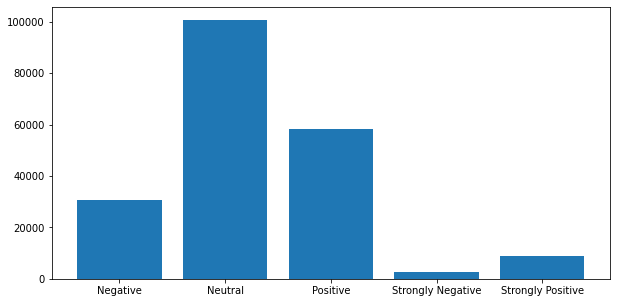

In [ ]:
#label graph

labels = data.groupby('Sentiment' ,as_index= True).count().index.values

values = data.groupby('Sentiment').size().values

plt.figure(figsize=(10,5))

plt.bar(labels ,values)

In [ ]:
#'Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive'

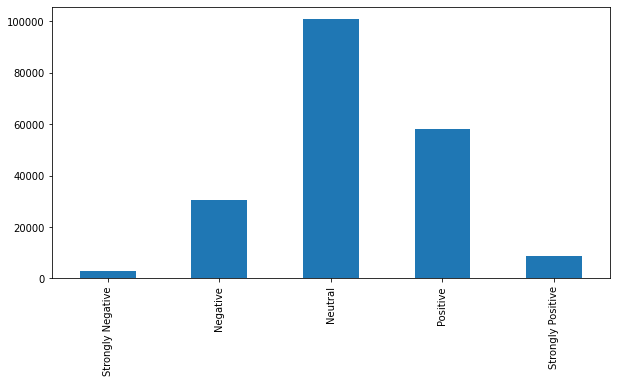

In [ ]:
import seaborn as sns

df_new = data['Sentiment'].copy()
#df_new.head()

plt.figure(figsize=(10,5))
df_new.value_counts()[['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']].plot(kind="bar")


#df_new.Sentiment.value_counts()[['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']].plot(kind="bar")
#sns.countplot(x='Sentiment', data=df_new, order=['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']);

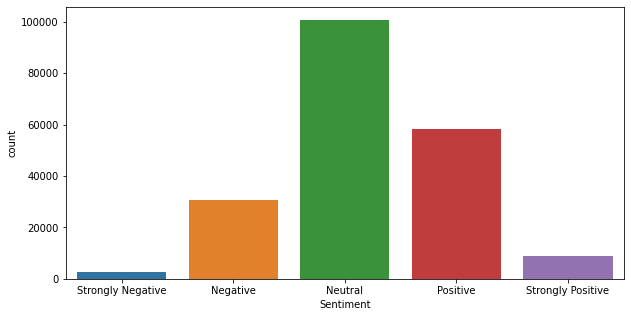

In [ ]:


df_new = data.copy()

plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df_new, order=['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']);

In [ ]:
#data.to_csv('Vaccine_Label_Data.csv')

Text(0, 0.5, 'Num of Tweet ')

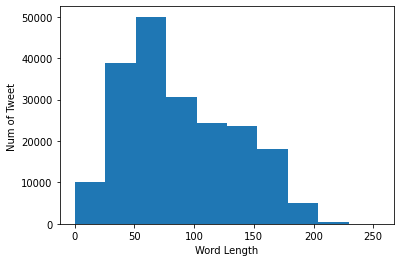

In [ ]:
data['process_tweet'].str.len().plot.hist()
plt.xlabel('Word Length')
plt.ylabel('Num of Tweet ')

In [ ]:
#import library for deep learning
from sklearn.model_selection import train_test_split


from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:

#for deep learning we need to only 2 colums(sentiment and process tweet)
data = data[['Sentiment','process_tweet' ]]
data.head()

,Sentiment,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
3,Positive,said vaccin free covid vaccin new lakh rs ever...
4,Positive,bjp realli present free covid vaccin state man...
5,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
data1 = data.copy()      #########    for experiment ,max_words

In [ ]:
data1.head()

,Sentiment,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
3,Positive,said vaccin free covid vaccin new lakh rs ever...
4,Positive,bjp realli present free covid vaccin state man...
5,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
data1 = data1.reset_index(drop=True) #for removing missig index 

#see previous index 3 is replaced by new index 2
data1.head() 

,Sentiment,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
unique_words = set(data1['process_tweet'])
count = 0
for word in unique_words:
  count += 1
print(count)

163967


In [ ]:
#tokenization
tokenizer = Tokenizer(num_words=163967, split=' ')
#num_words: the maximum number of words to keep, based on word frequency. Only the most common num_words-1 words will be kept.


tokenizer.fit_on_texts(data1['process_tweet'].values)

X = tokenizer.texts_to_sequences(data1['process_tweet'].values)

In [ ]:
X[:3] #before padding

[[200,
  247,
  365,
  199,
  225,
  144,
  2,
  1,
  291,
  1808,
  59,
  16,
  291,
  91,
  2430,
  104,
  177,
  1116,
  364,
  1,
  134,
  860,
  1808,
  7304,
  9652,
  90,
  345,
  105,
  1947,
  450,
  733],
 [134, 1771, 59, 7777, 28152, 14302, 93, 3, 2, 1, 10978],
 [52, 1, 144, 2, 1, 37, 1269, 1405, 124, 712, 576, 7532]]

In [ ]:
#padding to make all text vector to same length

X = pad_sequences(X)

X[:3] #after padding

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   200,   247,   365,   199,   225,   144,     2,
            1,   291,  1808,    59,    16,   291,    91,  2430,   104,
          177,  1116,   364,     1,   134,   860,  1808,  7304,  9652,
           90,   345,   105,  1947,   450,   733],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,   134,  1771,    59,  7777, 28152,
        14302,    93,     3,     2,     1, 10978],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    

In [ ]:
X.shape[1]

51

In [ ]:
#creating models

model= Sequential()
model.add(Embedding(163967, 256 , input_length=X.shape[1]))
model.add(Dropout(0.3))

model.add(LSTM(256 , return_sequences=True , dropout=0.3 , recurrent_dropout=0.3))
model.add(LSTM(256,dropout=0.3 ,return_sequences=True , recurrent_dropout=0.3))

model.add(LSTM(128 , return_sequences=True , dropout=0.3 , recurrent_dropout=0.3))
model.add(LSTM(128,dropout=0.3 , recurrent_dropout=0.3))


model.add(Dense(5 , activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 256)           41975552  
_________________________________________________________________
dropout (Dropout)            (None, 51, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 51, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 51, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 51, 128)           197120    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 5)                 6

In [ ]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
#one hot encoding

y = pd.get_dummies(data1['Sentiment']).values

[print(data1['Sentiment'][i] ,y[i]) for i in range(0,5)]

Positive [0 0 1 0 0]
Strongly Positive [0 0 0 0 1]
Positive [0 0 1 0 0]
Positive [0 0 1 0 0]
Neutral [0 1 0 0 0]


[None, None, None, None, None]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 22)

In [ ]:
#trannig model
batch_size = 128
epochs = 10

In [ ]:
history = model.fit(x_train , y_train ,
          epochs = epochs,
          batch_size = batch_size,
          validation_split=0.1,
          verbose=1)

Epoch 1/10
1131/1131 [==============================] - 3346s 3s/step - loss: 0.5521 - accuracy: 0.7961 - val_loss: 0.2390 - val_accuracy: 0.9149
Epoch 2/10
1131/1131 [==============================] - 3335s 3s/step - loss: 0.2206 - accuracy: 0.9231 - val_loss: 0.1496 - val_accuracy: 0.9481
Epoch 3/10
1131/1131 [==============================] - 3298s 3s/step - loss: 0.1119 - accuracy: 0.9619 - val_loss: 0.0849 - val_accuracy: 0.9758
Epoch 4/10
1131/1131 [==============================] - 3321s 3s/step - loss: 0.0610 - accuracy: 0.9800 - val_loss: 0.0712 - val_accuracy: 0.9799
Epoch 5/10
1131/1131 [==============================] - 3312s 3s/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0618 - val_accuracy: 0.9815
Epoch 6/10
1131/1131 [==============================] - 3354s 3s/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0689 - val_accuracy: 0.9808
Epoch 7/10
1131/1131 [==============================] - 3308s 3s/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0654 -

In [ ]:
predictions = model.predict(x_test)
print('done')

done


In [ ]:
print(predictions)

[[1.2398233e-05 2.8592400e-04 9.9947923e-01 2.6589864e-06 2.1979012e-04]
 [6.8301713e-05 2.7084531e-04 9.9961555e-01 9.6398674e-07 4.4358556e-05]
 [1.3345711e-05 9.9995625e-01 2.0466849e-05 5.7980496e-06 4.0917807e-06]
 ...
 [1.1832240e-05 6.9228416e-05 9.9991047e-01 5.8177488e-07 7.8946778e-06]
 [1.8353514e-05 9.9997306e-01 7.0138985e-06 9.0368377e-07 5.9954243e-07]
 [1.4443370e-05 9.9991894e-01 4.2128817e-05 1.5668698e-05 8.9391369e-06]]


In [ ]:
%%time
score = model.evaluate(x_test, y_test , batch_size = batch_size)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

315/315 [==============================] - 163s 518ms/step - loss: 0.0666 - accuracy: 0.9822

ACCURACY: 0.9821917414665222
LOSS: 0.0666317418217659
CPU times: user 4min 51s, sys: 17.2 s, total: 5min 8s
Wall time: 2min 43s


In [ ]:
[print(data1['process_tweet'][i], predictions[i], y_test[i] ) for i in range(1, 3)
]

state shall wait thier vidhan sabha elect get covid vaccin biharpol [6.8301713e-05 2.7084531e-04 9.9961555e-01 9.6398674e-07 4.4358556e-05] [0 0 1 0 0]
said vaccin free covid vaccin new lakh rs everi account kind jumla [1.3345711e-05 9.9995625e-01 2.0466849e-05 5.7980496e-06 4.0917807e-06] [0 1 0 0 0]


[None, None]

In [ ]:
pred1 = np.argmax(predictions , axis=1)
pred1[:10]

array([2, 2, 1, 1, 2, 2, 3, 0, 2, 0])

In [ ]:
y_test = np.argmax(y_test , axis=1)


In [ ]:
print(y_train.shape)
print(x_train.shape)  #160824 trainnig data

(160824, 5)
(160824, 51)


In [ ]:
print(y_test.shape)
print(x_test.shape)     #40206 test data

(40206,)
(40206, 51)


In [ ]:
pos_count, neu_count, neg_count ,str_neg , str_pos = 0, 0, 0 ,0,0
real_pos, real_neu, real_neg , real_str_neg , real_str_pos= 0, 0, 0,0,0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    elif np.argmax(prediction)==3:
        str_neg +=1
    elif np.argmax(prediction)==4:
        str_pos += 1
    else:
        neg_count += 1
    
    if y_test[i]==2:
        real_pos += 1
    elif y_test[i]==1:    
        real_neu += 1
    elif y_test[i]==3:    
        real_str_neg += 1
    elif y_test[i]==4:    
        real_str_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Strongly Negative predictions:', str_neg)
print('Strongly Positive predictions:', str_pos)
print('\nReal positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)
print('Real strongly negative:', real_str_neg)
print('Real strongly positive:', real_str_pos)


print('\nDifferences(%) : ')
print('\nDifference between Real positive and Positive prediction = ' , ((real_pos - pos_count)/real_pos)*-100 )
print('Difference between Real negative and Negative prediction = ' , ((real_neg - neg_count)/real_neg)*100 )
print('Difference between Real neutral and Neutral prediction = ' , -((real_neu - neu_count)/real_neu)*100 )
print('Difference between Real strongly negative and Strongly Negative prediction = ' , ((real_str_neg - str_neg)/real_str_neg)*100 )
print('Difference between Real strongly positive and Strongly Positive prediction = ' , ((real_str_pos - str_pos)/real_str_pos)*100 )


#Total 40206 is our test data 

Positive predictions: 11701
Neutral predictions: 20140
Negative predictions: 6149
Strongly Negative predictions: 537
Strongly Positive predictions: 1679

Real positive: 11685
Real neutral: 20194
Real negative: 6032
Real strongly negative: 541
Real strongly positive: 1754

Differences(%) : 

Difference between Real positive and Positive prediction =  0.13692768506632433
Difference between Real negative and Negative prediction =  -1.9396551724137931
Difference between Real neutral and Neutral prediction =  -0.2674061602456175
Difference between Real strongly negative and Strongly Negative prediction =  0.7393715341959335
Difference between Real strongly positive and Strongly Positive prediction =  4.275940706955531


In [ ]:
print(confusion_matrix(y_test , pred1 ,normalize=None))

[[ 5865    53    86    28     0]
 [  108 20022    54     8     2]
 [  136    64 11455     0    30]
 [   40     0     0   501     0]
 [    0     1   106     0  1647]]


In [ ]:
print(confusion_matrix(y_test , pred1))

[[ 5865    53    86    28     0]
 [  108 20022    54     8     2]
 [  136    64 11455     0    30]
 [   40     0     0   501     0]
 [    0     1   106     0  1647]]


In [ ]:
print(classification_report(y_test , pred1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6032
           1       0.99      0.99      0.99     20194
           2       0.98      0.98      0.98     11685
           3       0.93      0.93      0.93       541
           4       0.98      0.94      0.96      1754

    accuracy                           0.98     40206
   macro avg       0.97      0.96      0.96     40206
weighted avg       0.98      0.98      0.98     40206



In [ ]:
accuracy_score(y_test , pred1)

0.9821917126796995

In [ ]:
print(confusion_matrix(y_test , pred1))

[[ 5865    53    86    28     0]
 [  108 20022    54     8     2]
 [  136    64 11455     0    30]
 [   40     0     0   501     0]
 [    0     1   106     0  1647]]


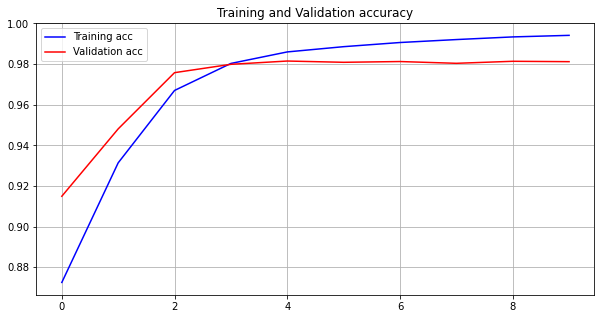

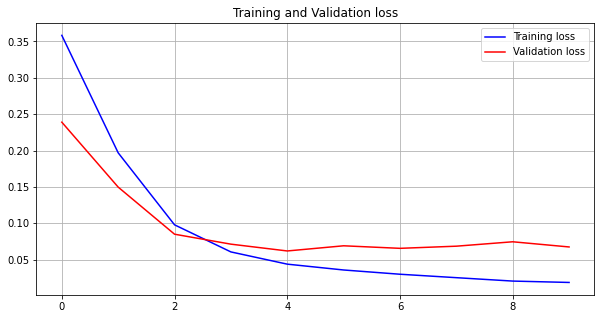

In [ ]:
plt.figure(figsize=(10,5))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.grid(True)
 
plt.figure(figsize=(10,5))
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.grid(True)
plt.legend()

plt.show()


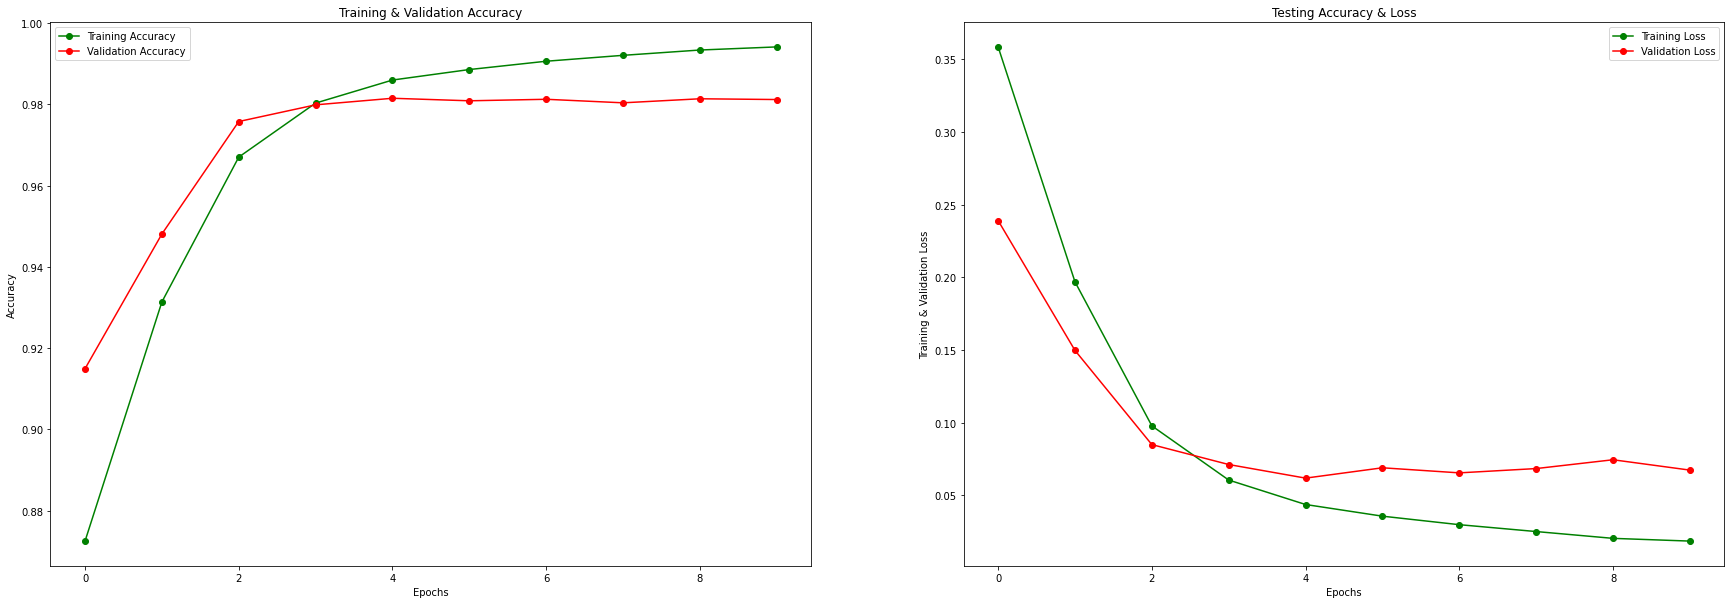

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(30,10)


ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')

ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

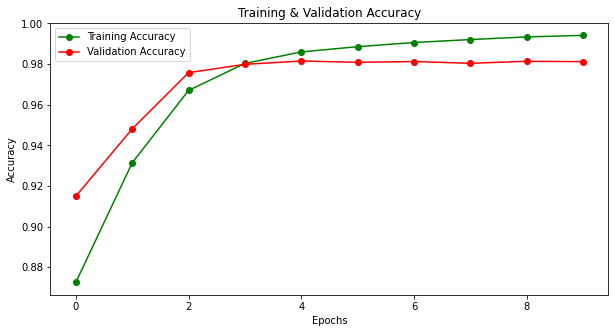

In [ ]:
epochs = [i for i in range(10)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))


plt.plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

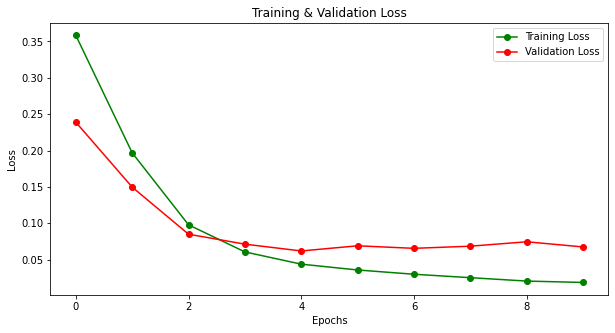

In [ ]:
epochs = [i for i in range(10)]

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))


plt.plot(epochs , train_loss , 'go-' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
plt.title('Training & Validation Loss')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

Text(0, 0.5, 'Label')

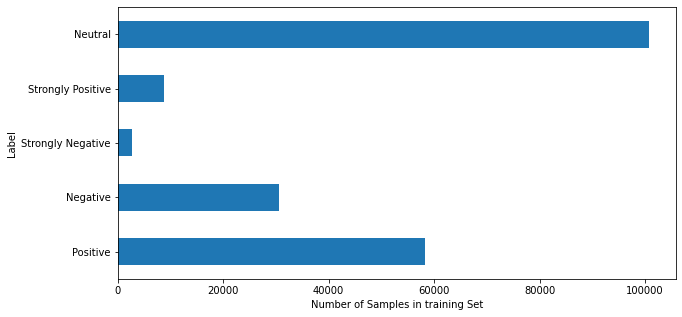

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax = data1['Sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('Label')